In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib

import numpy as np

sns.set_style('whitegrid')

In [2]:
RESULT_DIR = pathlib.Path('../../results-new-sliced')

# OVERHEADS = [0.01, 0.1, 0.15, 0.2]
OVERHEADS = [0.01, 0.1, 0.15, 0.2]


In [3]:
def plot_cost_vs_trace(sort_by_interval=None):
    fig = plt.figure(dpi=300, figsize=(6, 5))
    axes = fig.subplots((len(OVERHEADS)+1)//2, 2)
    for i, overhead in enumerate(OVERHEADS):
        ax = axes[i//2, i%2]
        RESULT_PATH = RESULT_DIR / f'real_overhead={overhead}.json'
        df = pd.read_json(RESULT_PATH, orient='columns')
        algorithms = df['algorithm'].unique()
        df = df[~df['use_avg']]
        if 'max slice slacks' in df.columns:
            df = df[df['max slice slacks'].isna() & df['max total slacks'].isna()]

        base = 'time_sliced'
        to_compare = 'loose_time_sliced'

        df = df[df['algorithm'].isin([base, to_compare])]
        print(df['algorithm'].unique())

        if sort_by_interval:
            df_slice = df[(df['slice interval'] == sort_by_interval) | (df['slice interval'] == 52)]
            base_cost = df_slice[df_slice['algorithm'] == base]['cost'].values[0]
            compare_cost = df_slice[df_slice['algorithm'] == to_compare]['cost'].values[0]
            ratio = np.array(compare_cost) / np.array(base_cost)
            order_idx = np.argsort(ratio)
        for slice_interval in sorted(df['slice interval'].unique()):
            df_slice = df[(df['slice interval'] == slice_interval) | (df['slice interval'] == 52)]
            df_base = df_slice[df_slice['algorithm'] == base]
            assert len(df_base) == 1, (base, slice_interval)
            df_compare = df_slice[(df_slice['algorithm'] == to_compare)
                                  & (df['slice interval'] == slice_interval)]
            assert len(df_compare) == 1, (df_compare, to_compare, slice_interval)

            base_cost = np.array(df_base['cost'].values[0])
            compare_cost = np.array(df_compare['cost'].values[0])
            ratio = compare_cost / base_cost
            if sort_by_interval:
                ratio = ratio[order_idx]
            else:
                ratio.sort()
            sns.lineplot(x=np.arange(1000)/1000, y=ratio, label=f'{slice_interval:.0f}h', ax=ax, linewidth=1, alpha=0.8)
            ax.hlines(1, 0, 1, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
            ax.set_title(f'Overhead={overhead}')


        # ax.set_title(f'{to_compare} / {base} (Overhead={overhead})')
        if i % 2 == 0:
            ax.set_ylabel('Cost ratio (Log scale)')
        if i >= 2:
            ax.set_xlabel('Fraction of traces')
        ax.set_ylim(0.3, 3)
        ax.set_yscale('log', base=2)
        ax.legend().set_visible(False)
    fig.legend(title='Slice interval', loc='lower center', ncol=5, handles=axes[0, 0].get_legend_handles_labels()[0], bbox_to_anchor=(0.5, -0.08))
    fig.suptitle('Cost ratio of loose time sliced vs. time sliced\n(Cost ratios are sorted individually)', y=0.95)
    fig.tight_layout()
    plt.show()

['time_sliced' 'loose_time_sliced']


/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will b

['time_sliced' 'loose_time_sliced']


/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will b

['time_sliced' 'loose_time_sliced']


/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will b

['time_sliced' 'loose_time_sliced']


/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will b

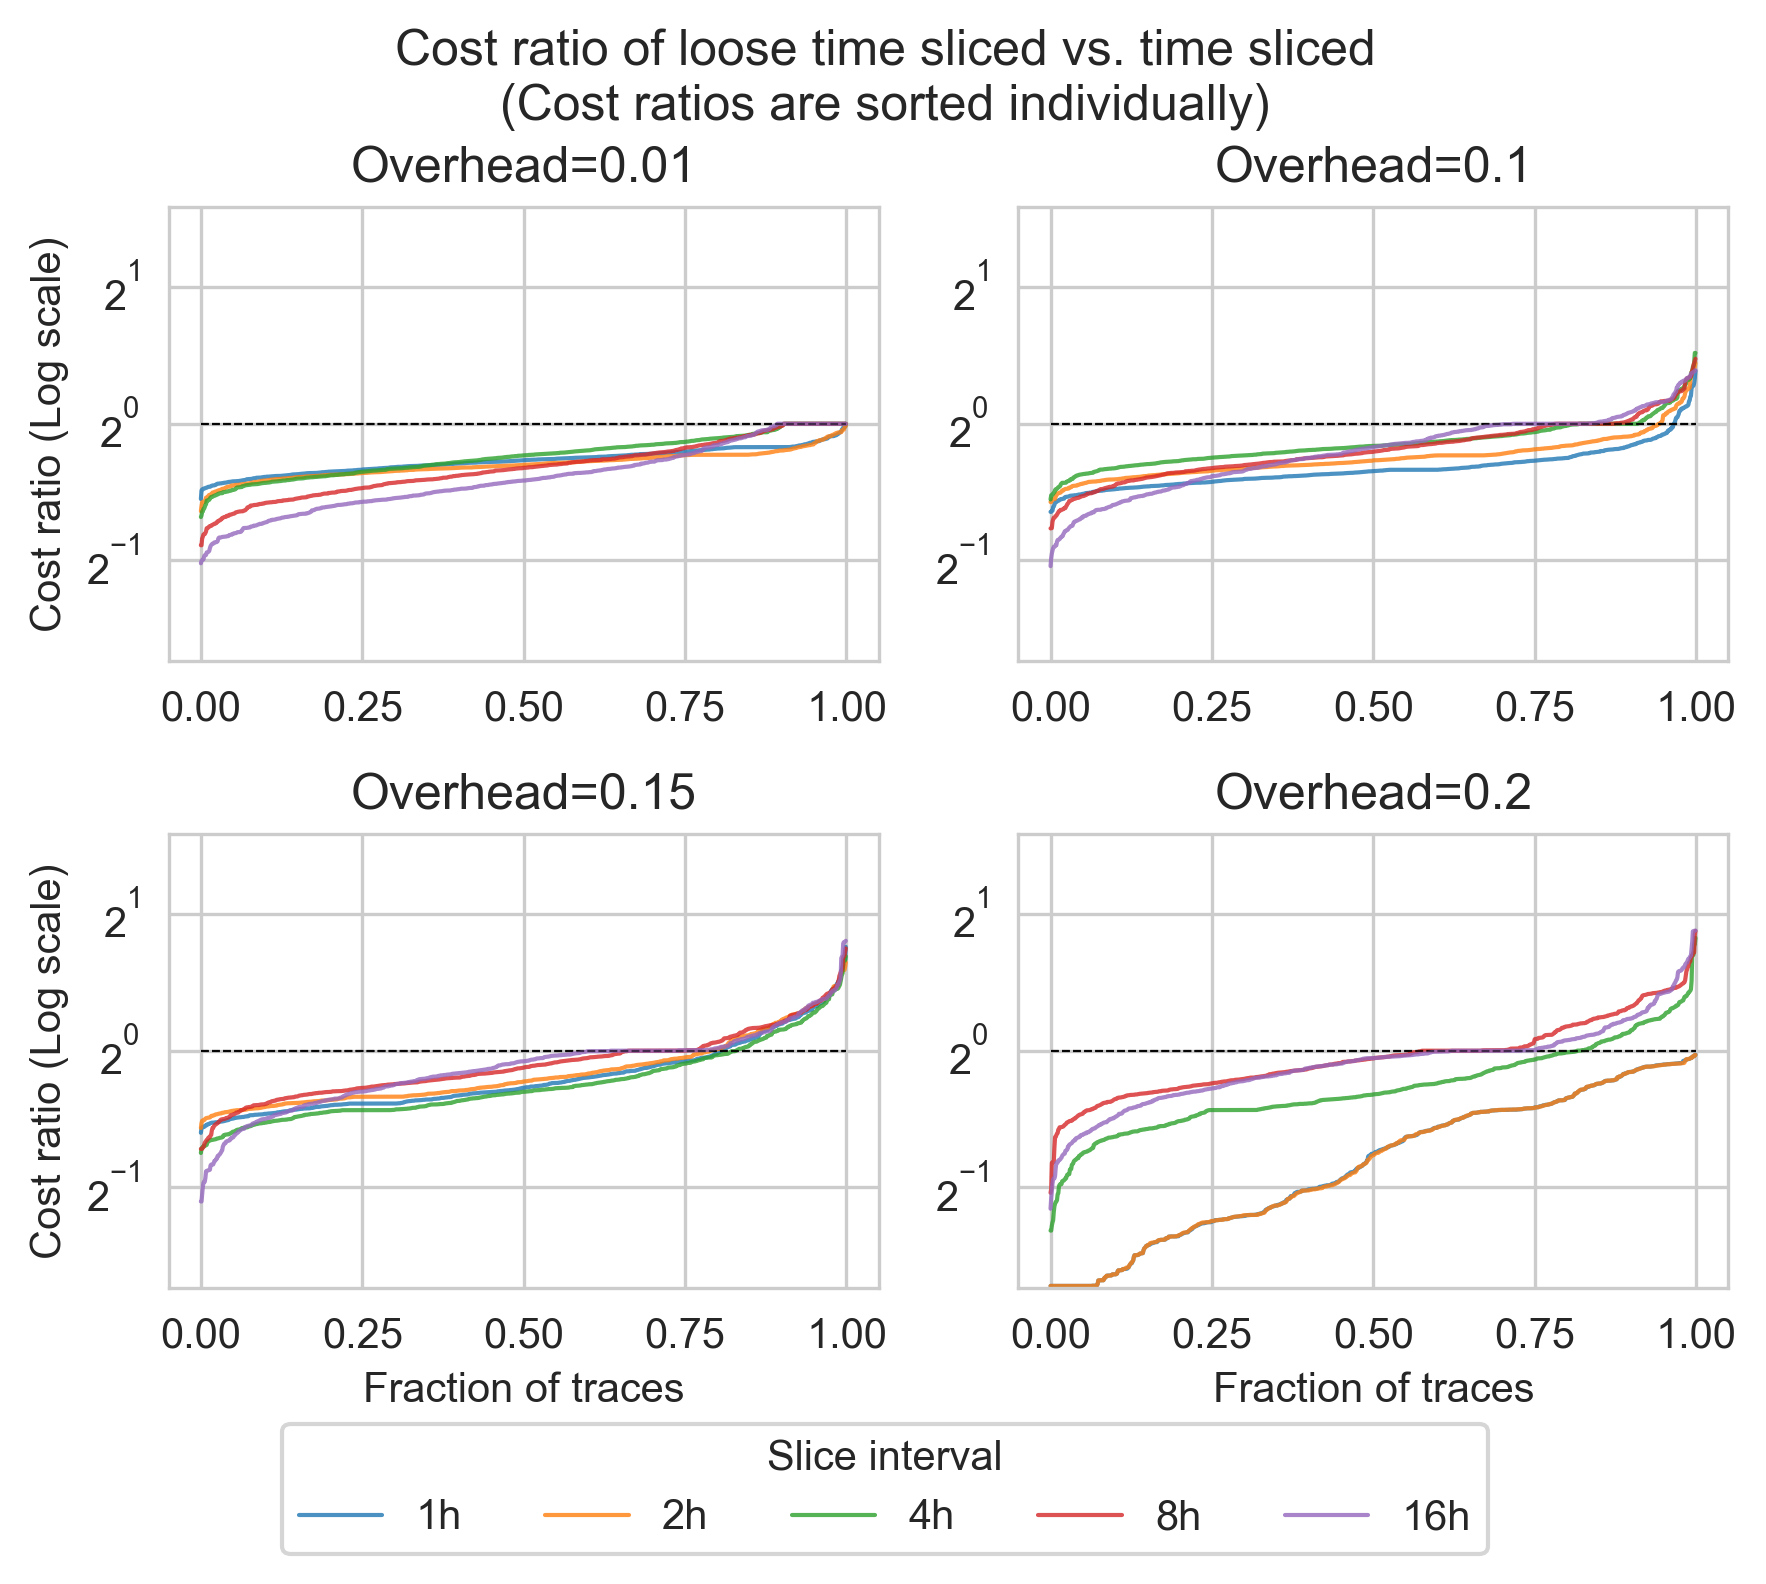

In [45]:
plot_cost_vs_trace()


['time_sliced' 'loose_time_sliced']
['time_sliced' 'loose_time_sliced']


/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will b

['time_sliced' 'loose_time_sliced']
['time_sliced' 'loose_time_sliced']


/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_4340/4197372498.py:29: UserWarning: Boolean Series key will b

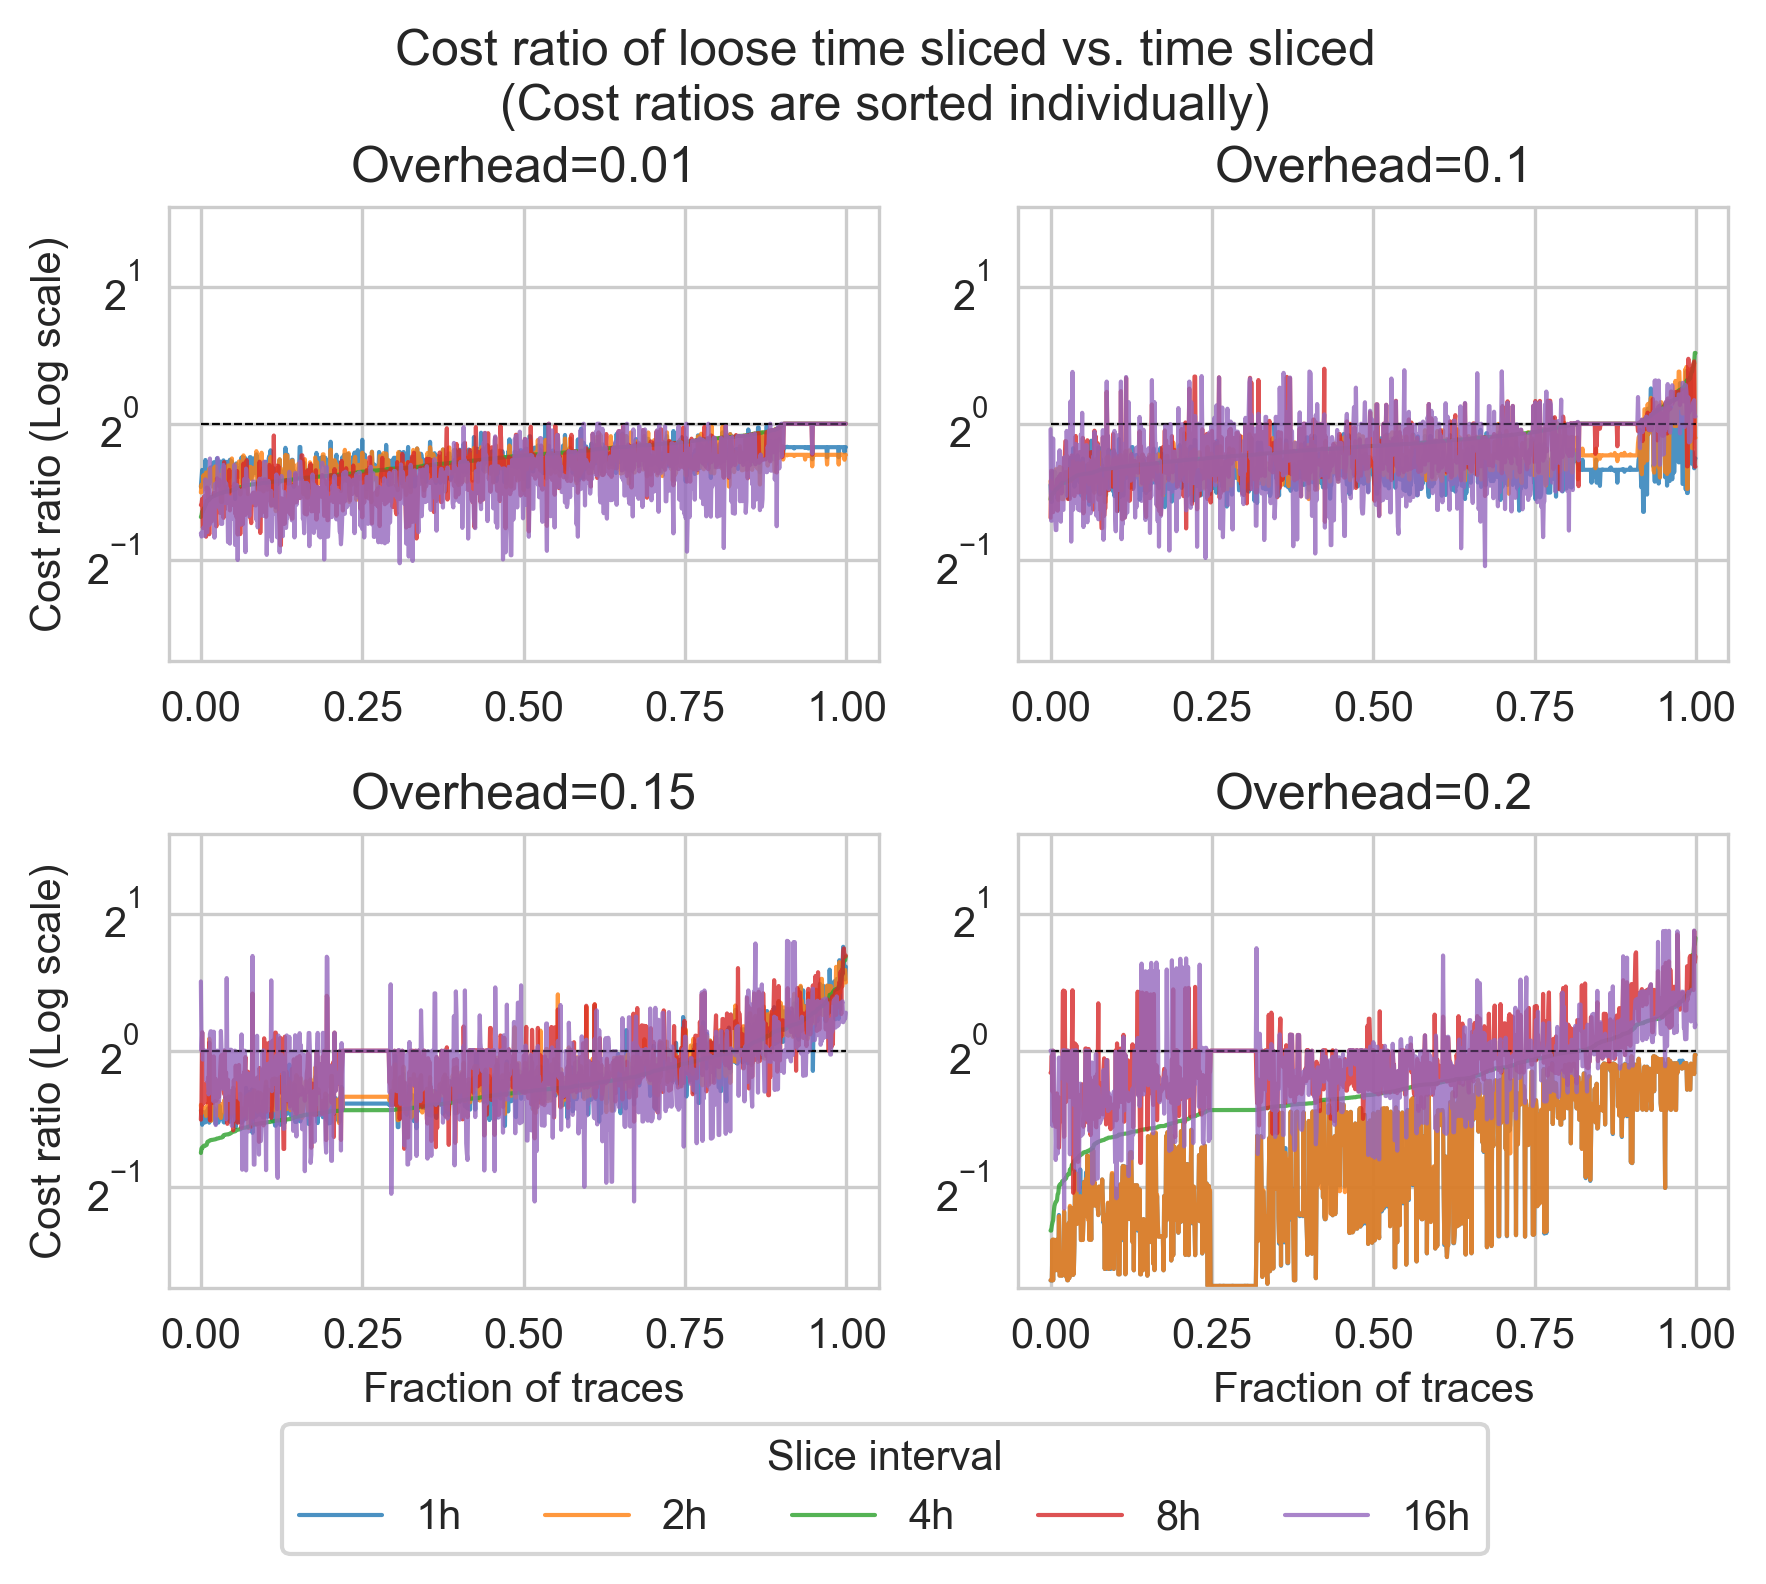

In [46]:
plot_cost_vs_trace(sort_by_interval=4)

In [32]:
def plot_switches_vs_trace():
    fig = plt.figure(dpi=300, figsize=(6, 5))
    axes = fig.subplots((len(OVERHEADS) + 1) // 2, 2)
    for i, overhead in enumerate(OVERHEADS):
        ax = axes[i // 2, i % 2]
        RESULT_PATH = RESULT_DIR / f'real_overhead={overhead}.json'
        df = pd.read_json(RESULT_PATH, orient='columns')
        algorithms = df['algorithm'].unique()
        df = df[~df['use_avg']]
        if 'max slice slacks' in df.columns:
            df = df[df['max slice slacks'].isna()
                    & df['max total slacks'].isna()]

        base = 'time_sliced'
        to_compare = 'loose_time_sliced'

        df = df[df['algorithm'].isin([base, to_compare])]
        print(df['algorithm'].unique())


        for slice_interval in sorted(df['slice interval'].unique()):
            df_slice = df[(df['slice interval'] == slice_interval) |
                          (df['slice interval'] == 52)]
            df_base = df_slice[df_slice['algorithm'] == base]
            assert len(df_base) == 1, (base, slice_interval)
            df_compare = df_slice[(df_slice['algorithm'] == to_compare)
                                  & (df['slice interval'] == slice_interval)]
            assert len(df_compare) == 1, (df_compare, to_compare,
                                          slice_interval)

            base_switches = np.array(df_base['switches'].values[0])
            compare_switches = np.array(df_compare['switches'].values[0])


            sort_idx = np.argsort(base_switches)
            base_switches = base_switches[sort_idx]
            compare_switches = compare_switches[sort_idx]

            sns.lineplot(x=np.arange(1000) / 1000,
                         y=base_switches,
                         label=f'{base}({slice_interval:.0f}h)',
                         ax=ax,
                         linewidth=1,
                         alpha=0.8)
            sns.lineplot(x=np.arange(1000) / 1000,
                         y=compare_switches,
                         label=f'{to_compare}({slice_interval:.0f}h)',
                         ax=ax,
                         linewidth=1,
                         alpha=0.8)
            ax.set_title(f'Overhead={overhead}')

        # ax.set_title(f'{to_compare} / {base} (Overhead={overhead})')
        if i % 2 == 0:
            ax.set_ylabel('Switches')
        if i >= 2:
            ax.set_xlabel('Fraction of traces')
        # ax.set_ylim(0.3, 3)
        # ax.set_yscale('log', base=2)
        ax.legend().set_visible(False)
    fig.legend(title='Slice interval',
               loc='lower center',
               ncol=5,
               handles=axes[0, 0].get_legend_handles_labels()[0],
               bbox_to_anchor=(0.5, -0.08))
    fig.suptitle(
        'Cost ratio of loose time sliced vs. time sliced\n(Cost ratios are sorted individually)',
        y=0.95)
    fig.tight_layout()
    plt.show()

['time_sliced' 'loose_time_sliced']


/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key w

['time_sliced' 'loose_time_sliced']


/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)


['time_sliced' 'loose_time_sliced']


/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key w

['time_sliced' 'loose_time_sliced']


/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_10663/2720316156.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_compare = df_slice[(df_slice['algorithm'] == to_compare)


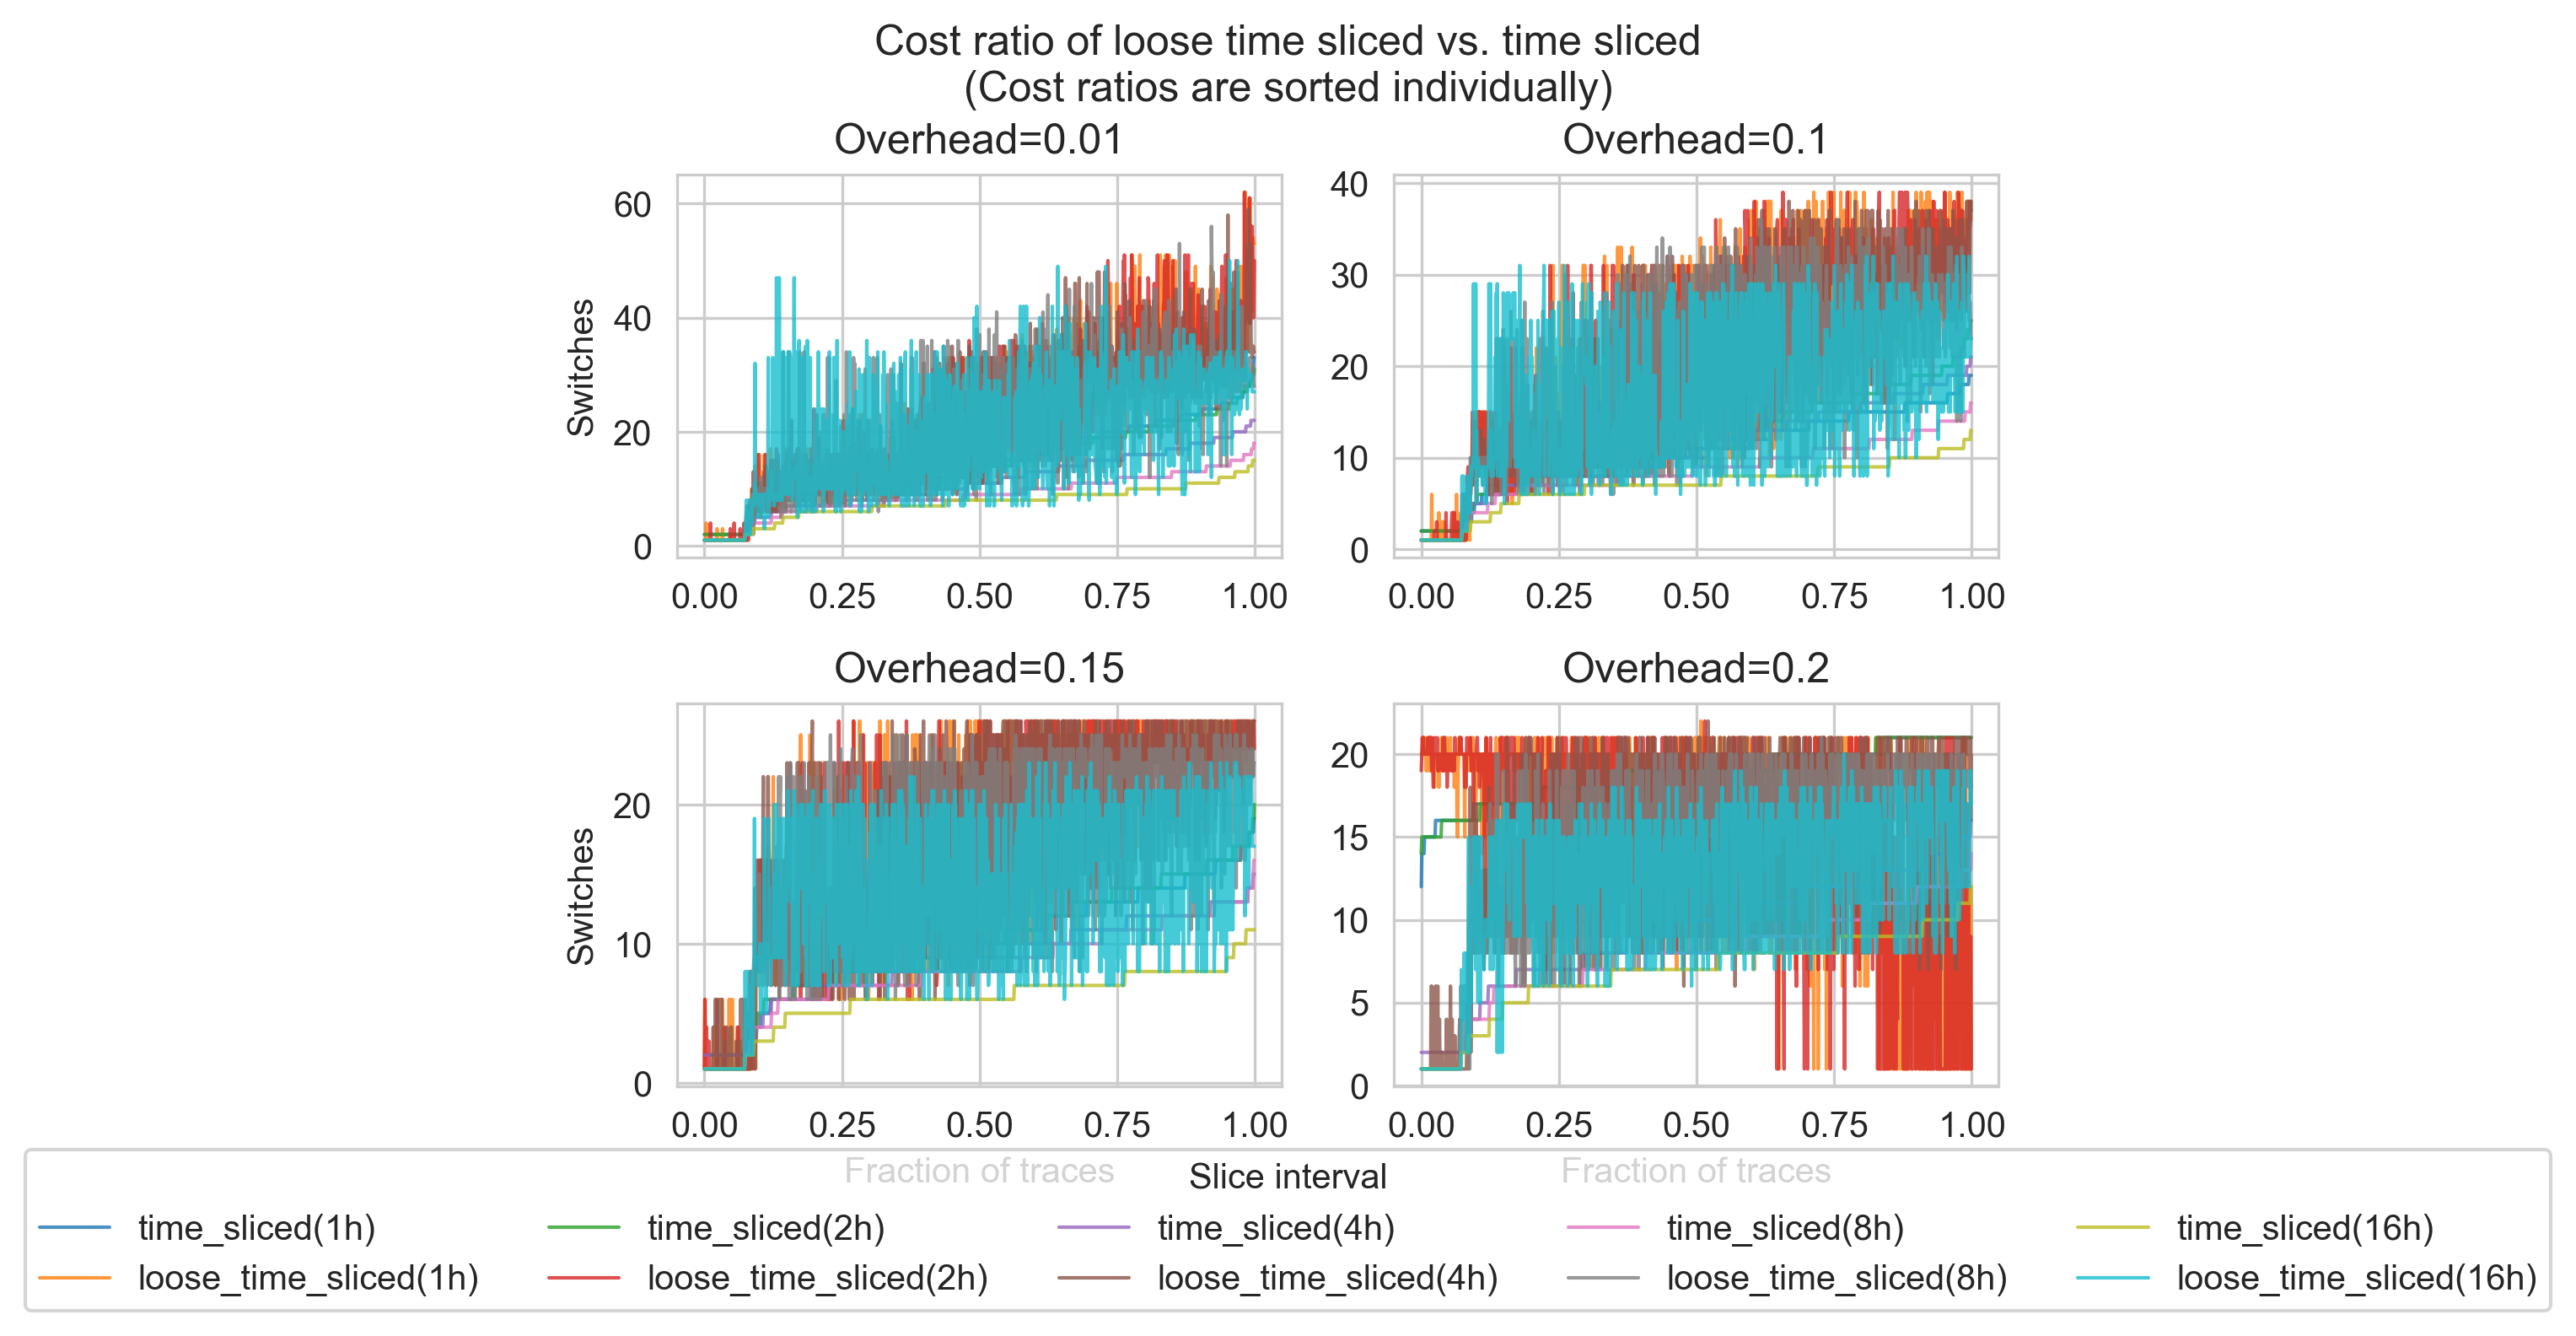

In [33]:
plot_switches_vs_trace()

In [34]:
overhead = 0.1
RESULT_PATH = RESULT_DIR / f'real_overhead={overhead}.json'
df = pd.read_json(RESULT_PATH, orient='columns')

In [35]:
df

,algorithm,slice interval,use_avg,max slice slacks,max total slacks,demand ratio,cost,switches,mean,p90,p95,std
0,on_demand,52,False,NaN,NaN,1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1.000000,1.000000,1.000000,0.000000
1,greedy,52,False,NaN,NaN,0.611349,"[0.8889284664, 0.8709910216000001, 0.575069882...","[5, 9, 5, 3, 6, 2, 5, 7, 6, 3, 4, 8, 1, 5, 6, ...",0.740513,0.991661,1.000000,0.232826
2,time_sliced,1,False,NaN,NaN,0.424640,"[0.6973042043000001, 0.8436142208, 0.597090598...","[15, 15, 13, 8, 10, 12, 9, 9, 12, 5, 6, 9, 15,...",0.620540,0.841364,0.880112,0.148438
3,loose_time_sliced,1,False,NaN,NaN,0.230166,"[0.5278597598, 0.6411320307, 0.495458421000000...","[29, 29, 16, 10, 20, 31, 23, 20, 37, 9, 12, 13...",0.495491,0.690689,0.730965,0.131066
4,loose_time_sliced,1,False,1.0,NaN,0.226859,"[0.5467384716, 0.6460108103000001, 0.500178098...","[29, 26, 16, 10, 18, 28, 21, 16, 35, 9, 10, 13...",0.491964,0.671492,0.717755,0.123276
...,...,...,...,...,...,...,...,...,...,...,...,...
344,group_time_sliced,"[16, 4]",True,NaN,NaN,0.423582,"[0.7350616279000001, 0.7471790262, 0.568931632...","[14, 8, 11, 3, 9, 7, 6, 8, 10, 3, 4, 10, 7, 7,...",0.616237,0.844042,0.869891,0.175556
345,group_time_sliced,"[16, 8]",True,NaN,NaN,0.441373,"[0.7316014203, 0.7484384965, 0.5442328742, 0.5...","[12, 6, 9, 3, 10, 6, 5, 8, 10, 3, 4, 10, 8, 7,...",0.627602,0.859208,0.894589,0.183071
346,group_time_sliced,"[16, 16]",True,NaN,NaN,0.456735,"[0.7813171405, 0.8546312504, 0.5750698826, 0.5...","[10, 6, 6, 3, 9, 8, 5, 8, 10, 3, 4, 10, 7, 6, ...",0.637521,0.876827,0.912368,0.187801
347,ideal_ilp,52,False,NaN,NaN,0.193843,"[0.5037974082, 0.6041701156, 0.4816175905, 0.4...","[15, 13, 10, 5, 10, 15, 10, 10, 20, 5, 10, 10,...",0.460863,0.626509,0.653304,0.106783
